In [84]:
from bs4 import BeautifulSoup
import requests

In [85]:
def scrape_webpage(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # If the request failed, this will raise an HTTPError
    except requests.exceptions.HTTPError as errh:
        print ("HTTP Error:",errh)
    except requests.exceptions.ConnectionError as errc:
        print ("Error Connecting:",errc)
    except requests.exceptions.Timeout as errt:
        print ("Timeout Error:",errt)
    except requests.exceptions.RequestException as err:
        print ("Something went wrong",err)
    else:
        soup = BeautifulSoup(response.text, 'html.parser')
        return soup

In [86]:
url = 'https://www.iba.edu.pk/faculty-profiles.php?school=&facultylist=Fulltime+Faculty&departmentlist=Computer+Science&faculty_name='
soup = scrape_webpage(url)

<!DOCTYPE HTML>
<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="IBA Faculty" name="description"/>
  <meta content="iba, iba karachi, iba university, iba website, institute of business administration, karachi, institute of business administration karachi, iba.edu.pk, institute of business administration, iba university karachi, www.iba.edu.pk, iba pakistan, karachi iba, iba edu pk, iba official website, iba login, iba karachi university, iba khi, faculty, iba faculty, faculty profiles, fulltime faculty, visiting faculty" name="keywords"/>
  <title>
   Faculty Profiles
  </title>
  <link href="css/iba-karachi-all.css" rel="stylesheet"/>
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css" rel="stylesheet"/>
  <link href="style/bootstrap.min.css" rel="stylesheet"/>
  <script src="js/jquery-1.8.1.min.js" type="text/javas
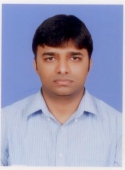
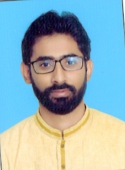
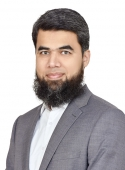
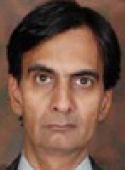
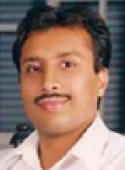
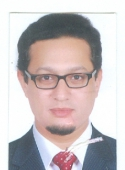
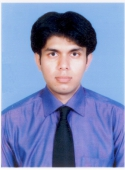
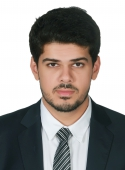
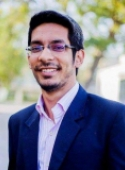
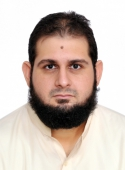
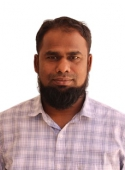
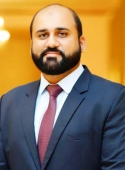
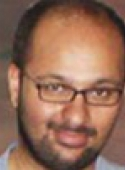
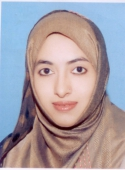
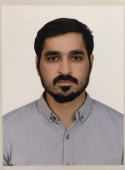
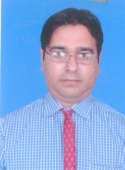
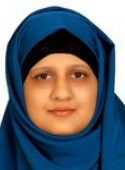
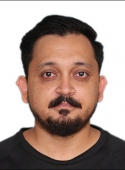
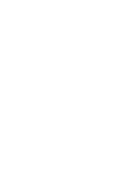
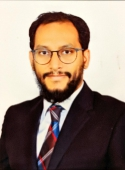
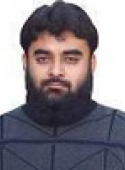
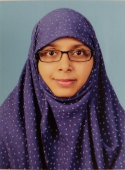
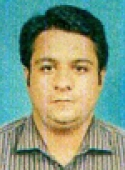
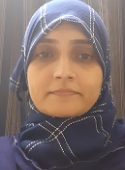
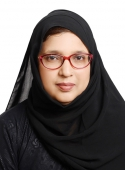
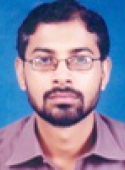
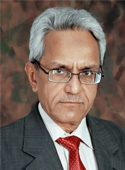
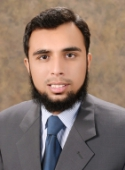
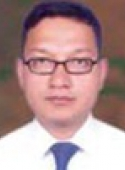

In [87]:
print(soup.prettify())  # print the scraped HTML

In [88]:
# Find all <div> tags with class 'faculty-profile-card'
faculty_cards = soup.find_all('div', class_='faculty-profile-card')


In [89]:
faculty_data = []

for card in faculty_cards:
    # Find the <div> tag with class 'details' inside the current 'faculty-profile-card'
    details = card.find('div', class_='details')
    
    url = "https://www.iba.edu.pk/" + details.find('a')['href']

     # Create a dictionary for the current faculty member
    faculty_data.append({
        'url': url
    })


In [90]:
# Print the data
for faculty in faculty_data:
    print(faculty)

{'url': 'https://www.iba.edu.pk/faculty-profile.php?ftype=Visiting&id=13256'}
{'url': 'https://www.iba.edu.pk/faculty-profile.php?ftype=&id=aaabdullah'}
{'url': 'https://www.iba.edu.pk/faculty-profile.php?ftype=Visiting&id=ssahbab'}
{'url': 'https://www.iba.edu.pk/faculty-profile.php?ftype=Visiting&id=saiyedshahab'}
{'url': 'https://www.iba.edu.pk/faculty-profile.php?ftype=Visiting&id=nakhter'}
{'url': 'https://www.iba.edu.pk/faculty-profile.php?ftype=Visiting&id=rakram'}
{'url': 'https://www.iba.edu.pk/faculty-profile.php?ftype=Visiting&id=sasim'}
{'url': 'https://www.iba.edu.pk/faculty-profile.php?ftype=&id=musman'}
{'url': 'https://www.iba.edu.pk/faculty-profile.php?ftype=Visiting&id=zarif'}
{'url': 'https://www.iba.edu.pk/faculty-profile.php?ftype=Visiting&id=warshad'}
{'url': 'https://www.iba.edu.pk/faculty-profile.php?ftype=Visiting&id=bhbutt'}
{'url': 'https://www.iba.edu.pk/faculty-profile.php?ftype=Visiting&id=ahaque'}
{'url': 'https://www.iba.edu.pk/faculty-profile.php?ftype=

In [91]:
for faculty in faculty_data:
    # Scrape the webpage for the current URL
    faculty_soup = scrape_webpage(faculty["url"])

    # Find the <div> tag with class 'faculty-profile-info'
    faculty_info = faculty_soup.find('div', class_='faculty-profile-info')

    h3_tags = faculty_info.find_all('h3')

    # Extract the data from the webpage and add it to the dictionary
    faculty_name = faculty_info.h1.text.strip()
    faculty['name'] = faculty_name
    faculty['faculty_details_url'] = "For further information regarding " + faculty_name + ", kindly refer to the following webpage: " + faculty['url']
    faculty['identity'] = faculty_info.h1.text.strip() + " is a member of IBA Computer Science Faculty."
    faculty['position'] = faculty_name + " is a " + faculty_info.h2.text.strip()
    faculty['department'] = faculty_name + " works in the Department of " + h3_tags[0].get_text(strip=True).replace('Department:', '')
    faculty['specialization'] = faculty_name + " specializes in " + h3_tags[1].get_text(strip=True).replace('Specialization:', '')
    faculty['onboard_status'] = faculty_name + " is currently " + h3_tags[2].get_text(strip=True).replace('Onboard Status:', '')
    faculty['email'] = "You can reach " + faculty_name + " at " + h3_tags[3].get_text(strip=True).replace('Email:', '')



In [92]:
# Print the data
for faculty in faculty_data:
    print(faculty)

{'url': 'https://www.iba.edu.pk/faculty-profile.php?ftype=Visiting&id=13256', 'name': 'Masood Alam Abbasi', 'faculty_details_url': 'For further information regarding Masood Alam Abbasi, kindly refer to the following webpage: https://www.iba.edu.pk/faculty-profile.php?ftype=Visiting&id=13256', 'identity': 'Masood Alam Abbasi is a member of IBA Computer Science Faculty.', 'position': 'Masood Alam Abbasi is a Visiting Faculty', 'department': 'Masood Alam Abbasi works in the Department of Computer Science', 'specialization': 'Masood Alam Abbasi specializes in Computer Science', 'onboard_status': 'Masood Alam Abbasi is currently Available', 'email': 'You can reach Masood Alam Abbasi at maabbasi@iba.edu.pk'}
{'url': 'https://www.iba.edu.pk/faculty-profile.php?ftype=&id=aaabdullah', 'name': '', 'faculty_details_url': 'For further information regarding , kindly refer to the following webpage: https://www.iba.edu.pk/faculty-profile.php?ftype=&id=aaabdullah', 'identity': ' is a member of IBA Com

In [93]:
for faculty in faculty_data:
    # Scrape the webpage for the current URL
    faculty_soup = scrape_webpage(faculty["url"])
    print(faculty["name"])

    # Find the div with class 'tab-content'
    tab_content = faculty_soup.find('div', class_='tab-content')

     # Extract work experience
    work_experience_tag = tab_content.find('div', id='overview')
    if work_experience_tag:
        work_experience = work_experience_tag.find('h3').find_next_sibling('ul').get_text(strip=True)
        faculty['work_experience'] = "Here is the list of " + faculty["name"] + "'s Work Experience: " + work_experience
    
    # Extract academic qualification
    qualification_tag = tab_content.find('div', id='qualification')
    if qualification_tag:
        qualification = qualification_tag.find('h3').find_next_sibling('ul').get_text(strip=True)
        faculty['qualification'] =  "Here is the list of " + faculty["name"] + "'s Qualifications: " + qualification
    
    # Extract courses taught
    courses_tag = tab_content.find('div', id='courses')
    if courses_tag:
        courses_taught = courses_tag.find('h3').find_next_sibling('ul').get_text(strip=True)
        faculty['courses_taught'] =  "Here is the list of courses taught by " + faculty["name"] + ": "+ courses_taught
    
    # Extract research interests
    interests_tag = tab_content.find('div', id='interests')
    if interests_tag:
        research_interests_tag = interests_tag.find('h3').find_next_sibling('ul')
        if research_interests_tag:
            research_interests = research_interests_tag.get_text(strip=True)
            faculty['research_interests'] =  "Here is the list of " + faculty["name"] + "'s research interest: " + research_interests
    
    # Extract research output
    output_tag = tab_content.find('div', id='output')
    if output_tag:
        research_output_tag = output_tag.find('h3').find_next_sibling('ul')
        if research_output_tag:
            research_output = research_output_tag.get_text(strip=True)
            faculty['research_output'] =  "Here is the list of " + faculty["name"] + "'s research output: " + research_output
    
    # Extract projects
    projects_tag = tab_content.find('div', id='projects')
    if projects_tag:
        projects_done_tag = projects_tag.find('h3').find_next_sibling('p')
        if projects_done_tag:
            projects_done = projects_done_tag.get_text(strip=True)
            faculty['projects_done'] =  "Here is the list of " + faculty["name"] + "'s projects: " + projects_done



Masood Alam Abbasi



AttributeError: 'NoneType' object has no attribute 'get_text'

In [ ]:
# Print the data
for faculty in faculty_data:
    print(faculty)

{'url': 'https://www.iba.edu.pk/faculty-profile.php?ftype=&id=uali', 'name': 'Usman Ali', 'faculty_details_url': 'For further information regarding Usman Ali, kindly refer to the following webpage: https://www.iba.edu.pk/faculty-profile.php?ftype=&id=uali', 'identity': 'Usman Ali is a member of IBA Computer Science Faculty.', 'position': 'Usman Ali is a Lecturer - CS(SMCS)', 'department': 'Usman Ali works in the Department of Computer Science', 'specialization': 'Usman Ali specializes in ', 'onboard_status': 'Usman Ali is currently Available', 'email': 'You can reach Usman Ali at uali@iba.edu.pk', 'work_experience': "Here is the list of Usman Ali's Work Experience: Lecturer at Institute of Business Administration, Karachi (Aug-2023 to PRESENT)Tech Project Manager( Part Time) at CODEX (Jul-2022 to May-2023)Director Academics ( Part Time) at Frontier Technology Institute, Karachi (May-2021 to Jun-2022)Instructor (Weekend Program) at Frontier Technology Institute, Karachi (Sep-2019 to Apr

In [ ]:
# Specify the filename for the text file
txt_filename = 'faculty_data_CS_FullTime_Detailed.txt'

# Write faculty data to text file
with open(txt_filename, 'w', encoding='utf-8') as txtfile:
    for faculty in faculty_data:
        for key, value in faculty.items():
            value = value.replace('"', '').replace(',', '')
            txtfile.write(f"{value}\n")

print(f'Text file "{txt_filename}" created successfully.')


Text file "faculty_data_CS_FullTime_Detailed.txt" created successfully.
